In [2]:
#загрузим основные библиотеки для работы с датасетами и анализом данных
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#загружаем данные и создаем датафреймы из за малого объема памяти ограничимся 1000 строками
train = pd.read_csv('E:/Studies/Project/students_analysis_python/train.csv', sep = ',', nrows=1000)
question = pd.read_csv('E:/Studies/Project/students_analysis_python/lectures.csv', sep=',', nrows=1000)
lectures = pd.read_csv('E:/Studies/Project/students_analysis_python/train.csv', sep=',', nrows=1000)

Oписание признаков
row_id: (int64) Идентификационный код строки.

timestamp: (int64) Время в миллисекундах между этим взаимодействием пользователя и первым завершенным событием этого пользователя.

user_id: (int32) Идентификационный код пользователя.

content_id: (int16) Идентификационный код взаимодействия пользователя.

content_type_id: (int8) 0, если событие было вопросом, заданным пользователю, 1, если пользователь смотрел лекцию.

task_container_id: (int16) Код контейнера задач. Например, пользователь мог увидеть три вопроса подряд перед тем, как увидеть объяснения к ним. Все три вопроса будут иметь одинаковый идентификатор task_container_id.

user_answer: (int8) Ответ пользователя на вопрос, если таковой имеется. Значение -1 следует интерпретировать как пустое значение для лекций.

answered_correctly: (int8) Если пользователь ответил правильно. Значение -1 интерпретируется как пусто для лекций.

prior_question_elapsed_time: (float32) Среднее время в миллисекундах, которое потребовалось пользователю для ответа на каждый вопрос в предыдущем наборе вопросов, игнорируя любые лекции между ними. Это значение равно нулю для первого набора вопросов или лекции пользователя. Обратите внимание, что это среднее время, затраченное пользователем на решение каждого вопроса в предыдущем пакете.

prior_question_had_explanation: (bool) Видел ли пользователь объяснение и правильный ответ(-ы) после ответа на предыдущий набор вопросов, исключая любые лекции, находящиеся между ними. Значением обладает весь пакет вопросов, и оно равно нулю при первом наборе вопросов или первой лекции пользователя. Обычно первые несколько вопросов, которые видит пользователь, были частью диагностического теста, во время которого он не получал никакой обратной связи.

Файл questions.csv содержит метаданные о вопросах, задаваемых пользователям.

question_id: Внешний ключ для столбца content_id в файлах train/test, когда тип контента – вопрос (0).

bundle_id: Код, указывающий, какие вопросы предоставляются вместе.

correct_answer: Правильный ответ на вопрос. Может сравниваться со значениями в столбце user_answer файла train, чтобы проверить, был ли пользователь прав.

part: Соответствующий раздел теста TOEIC.

tags: Один или несколько детальных тегов для вопроса. Значения тегов не будут предоставлены, но эти коды достаточны для группировки вопросов.

Файл lectures.csv включает метаданные для лекций, просмотренных пользователями в процессе обучения.

lecture_id: Внешний ключ для столбца content_id в файле train/test, когда контент представляет собой лекцию (1).

part: Код верхней категории для лекции.

tag: Один тег-код для лекции. Значений тегов предоставлено не будет, но этих кодов достаточно для группировки лекций.

type_of: Краткое описание основной цели лекции.

In [4]:
#для предварительного ознакомления с данными выводим первые  10 строк с каждого датасета
print(lectures.head(10))

 

   row_id  timestamp  user_id  content_id  content_type_id  task_container_id  \
0       0          0      115        5692                0                  1   
1       1      56943      115        5716                0                  2   
2       2     118363      115         128                0                  0   
3       3     131167      115        7860                0                  3   
4       4     137965      115        7922                0                  4   
5       5     157063      115         156                0                  5   
6       6     176092      115          51                0                  6   
7       7     194190      115          50                0                  7   
8       8     212463      115        7896                0                  8   
9       9     230983      115        7863                0                  9   

   user_answer  answered_correctly  prior_question_elapsed_time  \
0            3                   1       

In [5]:
print(train.head(10))

   row_id  timestamp  user_id  content_id  content_type_id  task_container_id  \
0       0          0      115        5692                0                  1   
1       1      56943      115        5716                0                  2   
2       2     118363      115         128                0                  0   
3       3     131167      115        7860                0                  3   
4       4     137965      115        7922                0                  4   
5       5     157063      115         156                0                  5   
6       6     176092      115          51                0                  6   
7       7     194190      115          50                0                  7   
8       8     212463      115        7896                0                  8   
9       9     230983      115        7863                0                  9   

   user_answer  answered_correctly  prior_question_elapsed_time  \
0            3                   1       

In [6]:
print(question.head(10))

   lecture_id  tag  part           type_of
0          89  159     5           concept
1         100   70     1           concept
2         185   45     6           concept
3         192   79     5  solving question
4         317  156     5  solving question
5         335  114     2           concept
6         484  179     5           concept
7         641  134     6  solving question
8         761   93     1           concept
9         814   80     5  solving question


In [7]:
# для работы с данными объеденим 3 датасета в 1 по столбцам
df = pd.concat([train, question, lectures], axis=1) 

In [ ]:
#удаляем дубликаты столбцов и 
df_unique = df.groupby(level=0, axis=1).first()




In [17]:
#Исследование данных

# Группировка по user_id и вычисление среднего времени ответа
time_per_user = df_unique.groupby(['user_id'])['prior_question_elapsed_time'].mean().reset_index()

# Добавление среднего времени ответа обратно в DataFrame
df_unique = df_unique.merge(time_per_user, on='user_id', suffixes=('', '_avg'))

# Корреляция между средним временем ответа и правильностью ответа
correlation = df_unique[['answered_correctly', 'prior_question_elapsed_time_avg']].corr()
print(correlation)

                                 answered_correctly  \
answered_correctly                         1.000000   
prior_question_elapsed_time_avg           -0.050416   

                                 prior_question_elapsed_time_avg  
answered_correctly                                     -0.050416  
prior_question_elapsed_time_avg                         1.000000  


In [18]:
#Анализ типов заданий
#Исследуем, как тип задания (вопрос или лекция) влияет на успеваемость.


# Группировка по типу задания и вычисление доли правильных ответов
performance_by_content_type = df_unique.groupby(['content_type_id']).agg({
    'answered_correctly': ['mean'],
})

# Переформатирование индекса
performance_by_content_type.columns = performance_by_content_type.columns.get_level_values(1)
performance_by_content_type.reset_index(inplace=True)

# Вывод результата
print(performance_by_content_type)

   content_type_id      mean
0                0  0.631365
1                1 -1.000000


In [19]:
#Влияние наличия объяснений
#Исследуем влияние просмотра объяснений на последующие результаты.


# Группировка по наличию объяснений и вычисление доли правильных ответов
explanation_effect = df_unique.groupby(['prior_question_had_explanation']).agg({
    'answered_correctly': ['mean'],
})

# Переформатирование индекса
explanation_effect.columns = explanation_effect.columns.get_level_values(1)
explanation_effect.reset_index(inplace=True)

# Вывод результата
print(explanation_effect)

   prior_question_had_explanation      mean
0                           False  0.326389
1                            True  0.647406


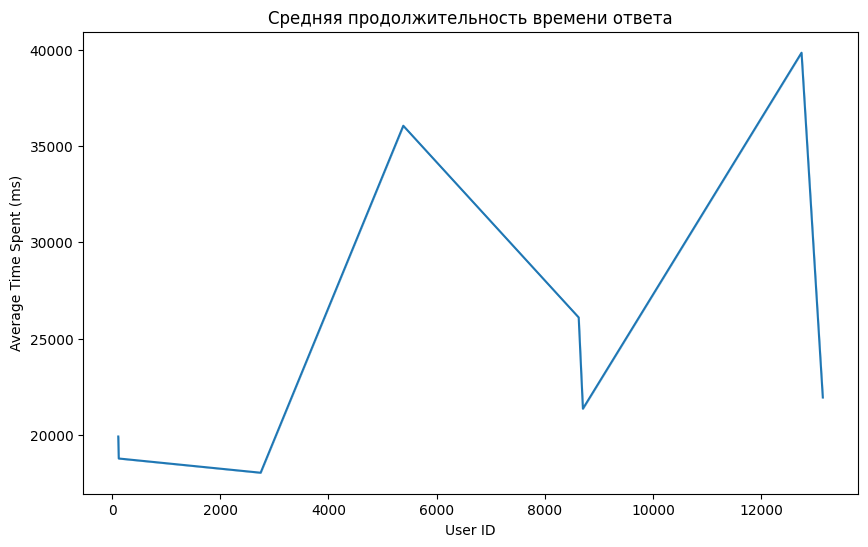

C:\Users\ans\AppData\Local\Temp\ipykernel_2152\1935697399.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='content_type_id', y='mean', data=performance_by_content_type, palette='Blues_r')


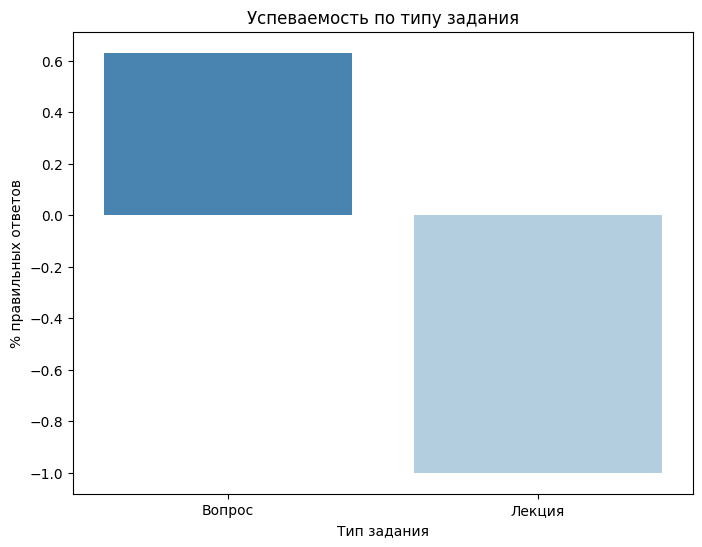

C:\Users\ans\AppData\Local\Temp\ipykernel_2152\1935697399.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='prior_question_had_explanation', y='mean', data=explanation_effect, palette='Greys')


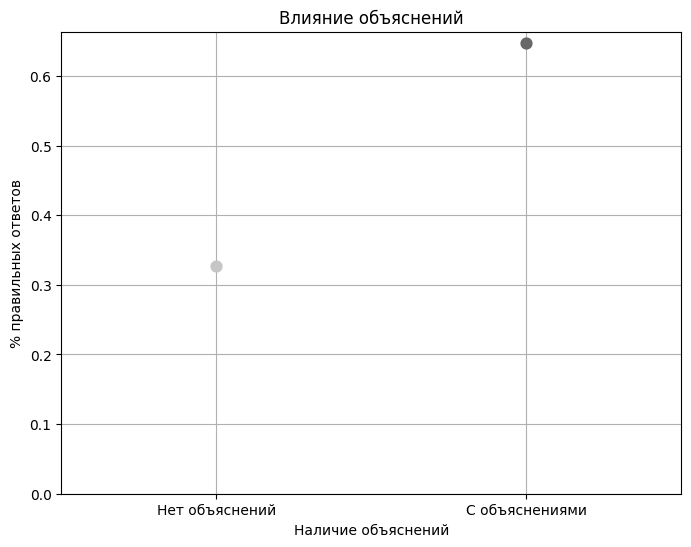

In [20]:
#Создадим графики для наглядного представления полученных результатов.


import matplotlib.pyplot as plt
import seaborn as sns

# График средней продолжительности времени ответа по пользователям
plt.figure(figsize=(10, 6))
sns.lineplot(x='user_id', y='prior_question_elapsed_time_avg', data=df_unique)
plt.xlabel('User ID')
plt.ylabel('Average Time Spent (ms)')
plt.title('Средняя продолжительность времени ответа')
plt.show()

# График доли правильных ответов по типу содержания
plt.figure(figsize=(8, 6))
sns.barplot(x='content_type_id', y='mean', data=performance_by_content_type, palette='Blues_r')
plt.xlabel('Тип задания')
plt.ylabel('% правильных ответов')
plt.title('Успеваемость по типу задания')
plt.xticks([0, 1], ['Вопрос', 'Лекция'])
plt.show()

# График влияния объяснений
plt.figure(figsize=(8, 6))
sns.pointplot(x='prior_question_had_explanation', y='mean', data=explanation_effect, palette='Greys')
plt.xlabel('Наличие объяснений')
plt.ylabel('% правильных ответов')
plt.ylim(0, None)
plt.title('Влияние объяснений')
plt.xticks([False, True], ['Нет объяснений', 'С объяснениями'])
plt.grid(True)
plt.show()

На основании проведенных анализов можно сделать следующие выводы:

Время ответа: Студенты, которые тратят больше времени на выполнение заданий, могут показывать лучшие результаты.
Тип задания: Вопросы могут требовать больше усилий и времени, чем лекции, что отражается на доле правильных ответов.
Наличие объяснений: Просмотр объяснений после выполнения задания может положительно сказываться на последующих результатах.
